# Project 1| Intro to Categorical Networks

### By Team VAC

## Introduction into Categorical Nodes


For our project, we picked a network of US college football divison. Each node represents a divison one college's football team and their categorical attribute is their regional conference. Our scope of analysis investigates interconnectedness of the US regional divisons compared with their eigenvalues within the network. There is a possibility of certain conference have greater centraility score compared the rest of the conferences in our list.

## Network Breakdown

### NCAA Football Data

Our dataset comes from an undirected graph in a graph modeling language (GML) format and has categorical attributes for each node along with edges. 

```
Creator "Mark Newman on Sat Jul 22 05:32:16 2006"
graph
[
  directed 0
  node
  [
    id 0
    label "BrighamYoung"
    value 7
  ]
  node
  [
    id 1
    label "FloridaState"
    value 0
  ]
  node
  [
    id 2
    label "Iowa"
    value 2
  ]
```
### Loading the network

We noticed from the documentation there is a total of eleven conferences in the network. There is a many to one mapping with the colleges and conferences, as mutliple colleges can be assinged to one conference.

In [1]:
#Importing networkx to analyze the footbal network set
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd


In [2]:
#import using read_gml and retrieve the cateogical variables of the college's name and regional conferences
teams =nx.read_gml("football.gml", label='id')
conferences = nx.get_node_attributes(teams, 'value')
team_names = nx.get_node_attributes(teams, 'label')

# color theme for each conference
color_family = {
    0: '#539A3B',
    1: '#9CA5A8',
    2: '#E38157',
    3: '#AA7D5F',
    4: '#333C3E',
    5: '#DD2B37',
    6: '#61AFA8',
    7: '#628FCE',
    8: '#AC8736',
    9: '#28C1DE',
    10: '#B2AE8E',
    11: '#A7BDD7'
}

#pairing the numerical key for conference with a assigned color code
for key in conferences:
    conferences[key] = color_family[conferences[key]]

#Referencing the assigned node colors to appear for the node's conference 
node_colors = conferences.values()


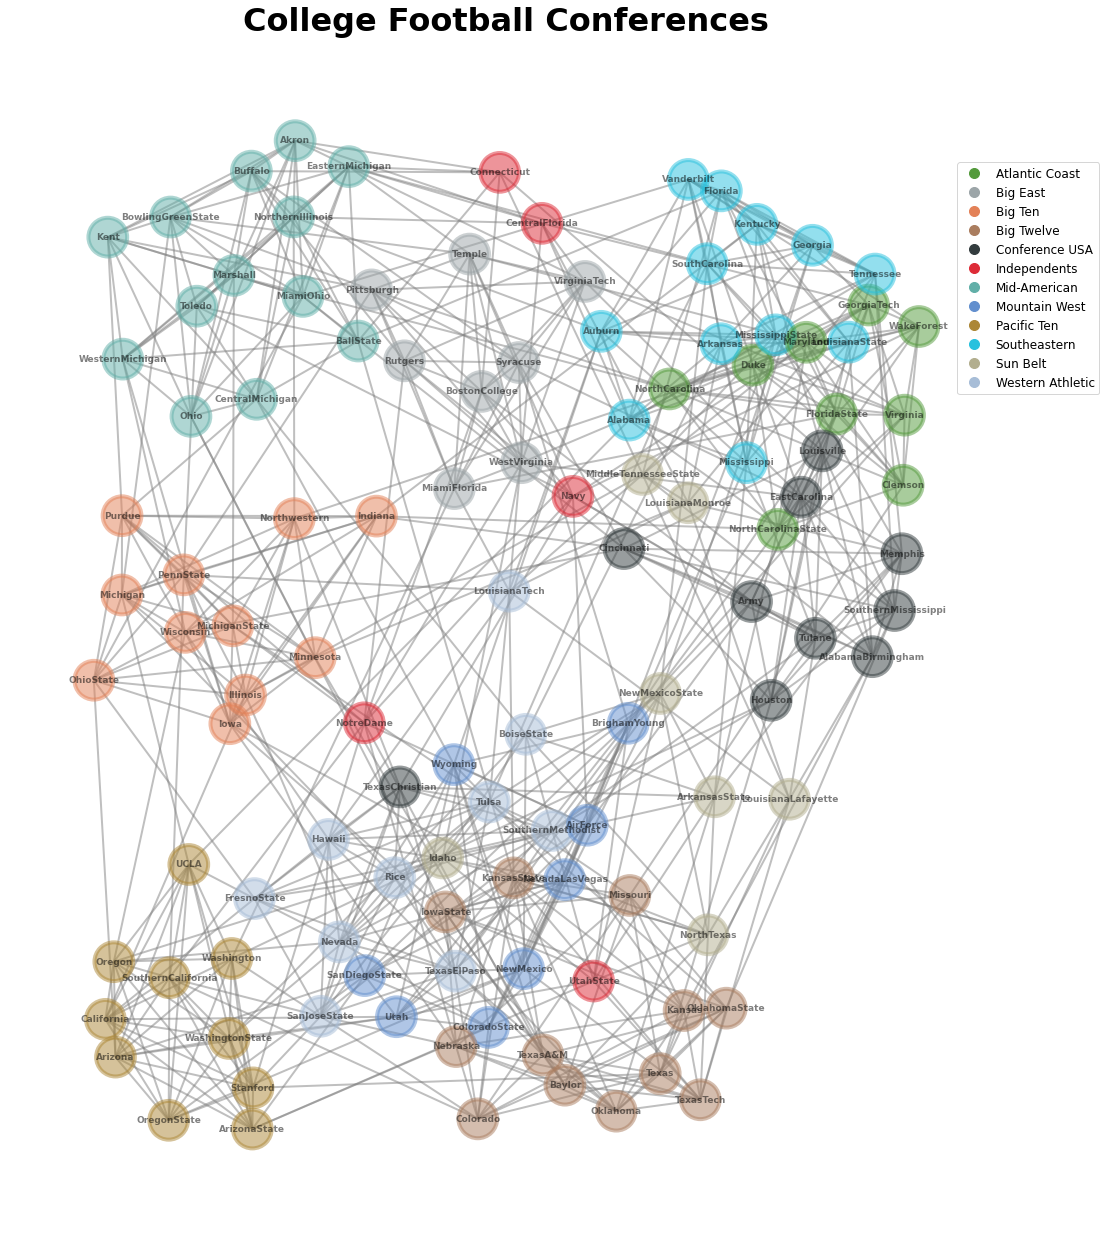

In [31]:
#Creating the network graph
plt.figure(figsize=(22, 22))
ax = plt.gca()
ax.set_aspect('equal')

plt.title("College Football Conferences", fontdict= { 'fontsize': 32, 'fontweight':'bold'}, loc='center')

colors = ['#539A3B','#9CA5A8','#E38157','#AA7D5F','#333C3E','#DD2B37','#61AFA8','#628FCE','#AC8736','#28C1DE','#B2AE8E','#A7BDD7']
texts = ['Atlantic Coast', 'Big East', 'Big Ten', 'Big Twelve', 'Conference USA', 'Independents', 'Mid-American', 'Mountain West', 'Pacific Ten','Southeastern','Sun Belt','Western Athletic']

patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(
           handles=patches, 
           ncol=1, 
           numpoints=1, 
           fontsize = 12, 
           loc="upper right",
           bbox_to_anchor=(1.1, 0.9)
          )


nx.draw(teams,
        font_size=9,
        font_weight="bold",
        font_color="black",
        node_size=1500, 
        edge_color="grey",
        node_shape="o", 
        alpha=0.5, 
        linewidths=4, 
        width=2,
        node_color=node_colors,
        with_labels=True,
        labels=team_names
       )

plt.show()


### Overall Network Stats

Let's take a look at the overall statistics of the network. The network has 115 nodes, 613 edges, and a diameter of 4 nodes.  Nodes zero to three have the greatest connections within the network as they all carry a degree of 12. From the node degrees, the node's popularity between its neighbhors was calculated with the eigenvector centraility function. The top four nodes seen below are the highest connected nodes within the network, which means these college teams often compete in regional conferences. 


In [10]:
#Basic graph details
print(teams)
print(nx.diameter(teams))

# Calculate the degrees of all nodes
sorted_degree = sorted(nx.degree(teams), 
                       key=lambda x: x[1], 
                       reverse=True)
print(sorted_degree[0:4])

# Calculate the Eigenvector degree for all nodes
sorted_eigenvector = sorted(nx.eigenvector_centrality(teams).items(), 
                            key=lambda x: x[1], 
                            reverse=True)
print(sorted_eigenvector[0:4])



Graph with 115 nodes and 613 edges
4
[(0, 12), (1, 12), (2, 12), (3, 12)]
[(67, 0.1276829966998084), (53, 0.12257661539574176), (88, 0.12128875621075208), (7, 0.12072375014454013)]


### Data Wrangling - Graph to Dataframe

To help with defining clusters, we can convert the Networkx Graph object to a Panda dataframe.

In [5]:
conferences = {
    0 : 'Atlantic Coast',
    1 : 'Big East',
    2 : 'Big Ten',
    3 : 'Big Twelve',
    4 : 'Conference USA',
    5 : 'Independents',
    6 : 'Mid-American',
    7 : 'Mountain West',
    8 : 'Pacific Ten',
    9 : 'Southeastern',
    10 : 'Sun Belt',
    11 : 'Western Athletic'
}


tmp_list = []
for n in teams.nodes(data=True):
    tmp_list.append([n[1]['label'],conferences[n[1]['value']]])

df = pd.DataFrame(tmp_list, columns = ['College','Conference'])


df.sort_values(by=['Conference','College']).head(20)


,College,Conference
103,Clemson,Atlantic Coast
45,Duke,Atlantic Coast
1,FloridaState,Atlantic Coast
37,GeorgiaTech,Atlantic Coast
109,Maryland,Atlantic Coast
89,NorthCarolina,Atlantic Coast
25,NorthCarolinaState,Atlantic Coast
33,Virginia,Atlantic Coast
105,WakeForest,Atlantic Coast
29,BostonCollege,Big East


### Clustering conferences 

The network shows clustering of the nodes based on the conference variable. The conference variable seems to the cluster nodes of the same conference type with the expection of conference five (Independents). We can further explore the clustering of its categorical variable. The network's average clustering coefficient is 0.403 on the 0-1 scale. This cofficient value indicates a trend of node clustering throughout the network. We can calculate the centraility across the conferences with sub graphs.

Sub graphs can given us the freedom to calculate the centrality measure across the conferences. We have to seperate the network into its sub graphs based on the college's assigned conference.

In [6]:
#Lets see if there any disconnect groups from the conferences, if groups>1 then there's a disconnect
groups=nx.number_connected_components(teams)
print(groups)


1


In [7]:
#Find the average clustering coefficient of the network
avg=nx.average_clustering(teams)
print(avg)


0.40321601104209814


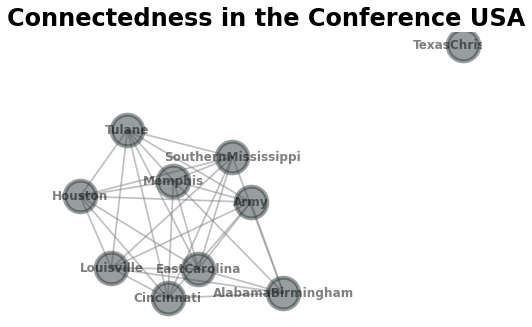

In [41]:
#Creating a filtered list of nodes based on the categorical variable, Conference
AC_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 0]
BE_list=[ n for n, d in teams.nodes(data=True) if d['value'] ==1]
BT_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 2]
BTW_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 3]
CU_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 4]
I_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 5]
MA_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 6]
MW_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 7]
PT_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 8]
S_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 9]
SB_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 10]
WA_list=[ n for n, d in teams.nodes(data=True) if d['value'] == 11]

#creating the sub graphs out of the clusters
sub_AC=teams.subgraph(AC_list)
sub_BE=teams.subgraph(BE_list)
sub_BT=teams.subgraph(BT_list)
sub_BTW=teams.subgraph(BTW_list)
sub_CU=teams.subgraph(CU_list)
sub_I=teams.subgraph(I_list)
sub_MA=teams.subgraph(MA_list)
sub_MW=teams.subgraph(MW_list)
sub_PT=teams.subgraph(PT_list)
sub_S=teams.subgraph(S_list)
sub_SB=teams.subgraph(SB_list)
sub_WA=teams.subgraph(WA_list)


#lets take a peak at one sub graph, i.e Conference USA
tn= nx.get_node_attributes(sub_CU, 'label')
nx.draw(sub_CU, 
        labels=tn, 
        with_labels=True,
        font_size=12,
        font_weight="bold",
        font_color="black",
        edge_color="grey",
        node_shape="o", 
        alpha=0.5, 
        linewidths=4, 
        node_size=1000,
        node_color="#333C3E",
        width=1.7,
        pos=nx.nx_pydot.graphviz_layout(sub_CU)
       )
plt.title("Connectedness in the Conference USA", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, loc='center')
plt.show()



### Disconnection within conferences

From the above figure, Texas Christian is a member of the Conference USA but did not compete against its cohorts. This suggests there are other conference clusters where some colleges also never played within their region. Additionally, there could be a theme where low closeness centrality scores indicate high disconnected within the conference cluster. Let's explore that thought below!

In [26]:
#calculating the closeness centrality based on the conference
Con_CC = [
   ['Atlantic Coast'   , nx.group_closeness_centrality(teams,AC_list)],
   ['Big East'         , nx.group_closeness_centrality(teams,BE_list)],
   ['Big Ten'          , nx.group_closeness_centrality(teams,BT_list)],
   ['Big Twelve'       , nx.group_closeness_centrality(teams,BTW_list)],
   ['Conference USA'   , nx.group_closeness_centrality(teams,CU_list)],
   ['Independents'     , nx.group_closeness_centrality(teams,I_list)],
   ['Mid-American'     , nx.group_closeness_centrality(teams,MA_list)],
   ['Mountain West'    , nx.group_closeness_centrality(teams,MW_list)],
   ['Pacific Ten'      , nx.group_closeness_centrality(teams,PT_list)],
   ['Southeastern'     , nx.group_closeness_centrality(teams,S_list)],
   ['Sun Belt'         , nx.group_closeness_centrality(teams,SB_list)],
   ['Western Athletic' , nx.group_closeness_centrality(teams,WA_list)]
]

conference_closeness_df = pd.DataFrame(Con_CC, columns = ['Conference','Closeness'])
conference_closeness_df.sort_values(by='Closeness', ascending=False).head(20)


,Conference,Closeness
11,Western Athletic,0.603448
5,Independents,0.601093
2,Big Ten,0.587571
4,Conference USA,0.580110
10,Sun Belt,0.574468
3,Big Twelve,0.547872
7,Mountain West,0.545918
6,Mid-American,0.545455
9,Southeastern,0.542105
0,Atlantic Coast,0.522167


### Cluster Findings
From our previous assumption, a disconnected group does not influence the it's closeness score as Western Athletic holds the highest rank. When we compare the sub graphs of the lowest and highest conferences, these visuals are almost identical. The difference is seen on the overall network shown in the beginning, where the Western Althetic's cluster captured mutliple clusters within its group. 

The Western Athletic cluster has the most influence in the entire network as its position and connections within the overall network out weighs the other clusters. 

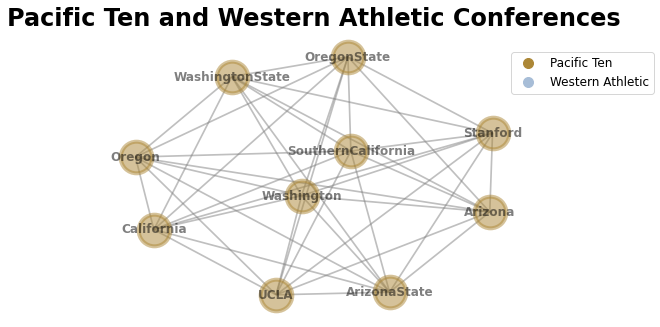

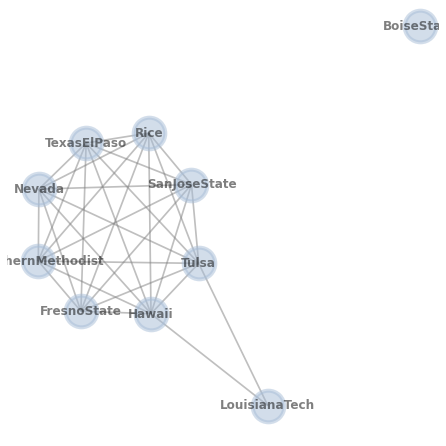

In [56]:
#Its shown Pacific Ten has lowest Closeness score, lets visualize
tn= nx.get_node_attributes(sub_PT, 'label')
nx.draw(sub_PT, 
        labels=tn, 
        with_labels=True,
        node_size=1000,
        width=1.7,
        font_size=12,
        font_weight="bold",
        font_color="black",
        edge_color="grey",
        node_shape="o", 
        node_color="#AC8736",
        alpha=0.5, 
        linewidths=4, 
        pos=nx.nx_pydot.graphviz_layout(sub_PT))


colors = ['#AC8736','#A7BDD7']
texts = ['Pacific Ten','Western Athletic']

patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(
           handles=patches, 
           ncol=1, 
           numpoints=1, 
           fontsize = 12, 
           loc="upper right",
           bbox_to_anchor=(1.3, 0.95)
          )

plt.title("Pacific Ten and Western Athletic Conferences", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, loc='center')
plt.show()

#Western Althetic has the highest closeness score, show its visual as well
plt.figure(figsize=(6, 6))
ax.set_aspect('equal')
tn= nx.get_node_attributes(sub_WA, 'label')
nx.draw(sub_WA, 
        labels=tn, 
        with_labels=True,
        node_size=1000,
        width=1.7,
        font_size=12,
        font_weight="bold",
        font_color="black",
        edge_color="grey",
        node_shape="o", 
        node_color="#A7BDD7",
        alpha=0.5, 
        linewidths=4, 
        pos=nx.nx_pydot.graphviz_layout(sub_WA))
plt.show()

### Takeaways

Clusters appear to have greater influence if their network contains mutliple groups within. For example, Pacific Ten has the lowest group closeness score as its nodes are tightly group on the boundary of the network. The Pacific Ten does not often compete beyond its conference region and it limits its paths throughout the network. On the other hand, Western Althetic has a diverse games with other clusters in the NCAA network.